# Assignment 2 - Hands on Training Data Influence
## Sandeep Kaur (301459836) ,  Jashandeep Kaur (301448909) ,   Kamal Kaur(301448878)

## Part 1:
### Dataset Description: 
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico,
Peru and Colombia, based on their eating habits and physical condition.

In [67]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 

### Features and Labels:
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [68]:
# data (as pandas dataframes) 
#features
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 

#labels
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 

#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)
# variable information 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


In [69]:
#conversion of y label and X features that are string into numeric array
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#features

# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

#convert string features to numeric form
string_features =['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

for feature in string_features:
    # Apply LabelEncoder to each string column
    X.loc[:,feature] = label_encoder.fit_transform(X[feature])

print("Features")
print(X.head())

#labels
y = y['NObeyesdad']

print(y)

Features
  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP   
0      0  21.0    1.62    64.0                              1    0   2.0  3.0  \
1      0  21.0    1.52    56.0                              1    0   3.0  3.0   
2      1  23.0    1.80    77.0                              1    0   2.0  3.0   
3      1  27.0    1.80    87.0                              0    0   3.0  3.0   
4      1  22.0    1.78    89.8                              0    0   2.0  1.0   

  CAEC SMOKE  CH2O SCC  FAF  TUE CALC MTRANS  
0    2     0   2.0   0  0.0  1.0    3      3  
1    2     1   3.0   1  3.0  0.0    2      3  
2    2     0   2.0   0  2.0  1.0    1      3  
3    2     0   2.0   0  2.0  0.0    1      4  
4    2     0   2.0   0  0.0  0.0    2      3  
0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_II

### Classification:
Lets Think of it as a classification Task and try to train the model and predict NObesity (Obesity Level), that allows 
which are Insufficient Weight,Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III
without converting them to numeric labels

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score,roc_curve, auc, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn

### Splitting into train and test sets :
In a random 80/20 split:

Approximately 80% of the data is used for training, and 20% is reserved for testing.
The split is performed randomly, ensuring that each subset is representative of the overall dataset

In [71]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

unique_classes = np.unique(y_train)

# Convert to binary format for each class
y_train_bin = label_binarize(y_train, classes=unique_classes)
y_valid_bin = label_binarize(y_valid, classes=unique_classes)

### Training Classifier

In [72]:
def defineModels():
    
    model_logistic_regression = LogisticRegression(max_iter=1000)
    model_knn_neighbours = make_pipeline(
                       StandardScaler(),
                       KNeighborsClassifier(n_neighbors=5))

    model_random_forest = make_pipeline(
        StandardScaler(),
        RandomForestClassifier(n_estimators=150,max_depth=12,min_samples_leaf=4))


    return model_logistic_regression, model_knn_neighbours, model_random_forest

In [73]:
model_logistic_regression,model_knn_neighbours, model_random_forest = defineModels()

### Model Logistic Regression

In [74]:
#Logistic Regression
model_logistic_regression.fit(X_train, y_train)

#Printing model accuracy
print("Results for Logistic Regression:")
# Predictions
y_pred_logistic_regression = model_logistic_regression.predict(X_valid)

# Accuracy
accuracy = accuracy_score(y_valid, y_pred_logistic_regression)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred_logistic_regression)
print(f"Confusion Matrix:\n{conf_matrix}")

#classification_report
print(classification_report(y_valid,y_pred_logistic_regression))
#check incorrect predictions
df_logistic_regression = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_logistic_regression})
print("Number of Incorrect predictions:" , len(df_logistic_regression[df_logistic_regression['truth'] != df_logistic_regression['prediction']]))


Results for Logistic Regression:
Accuracy: 0.8747044917257684
Confusion Matrix:
[[56  0  0  0  0  0  0]
 [11 39  0  0  0  8  4]
 [ 0  0 70  7  0  0  1]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 44  8]
 [ 0  0  3  0  0  5 42]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      1.00      0.91        56
      Normal_Weight       0.91      0.63      0.74        62
     Obesity_Type_I       0.93      0.90      0.92        78
    Obesity_Type_II       0.89      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.77      0.79      0.78        56
Overweight_Level_II       0.76      0.84      0.80        50

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.88      0.87      0.87       423

Number of Incorrect predictions: 53


#### Performance of Model Logistic Regression 

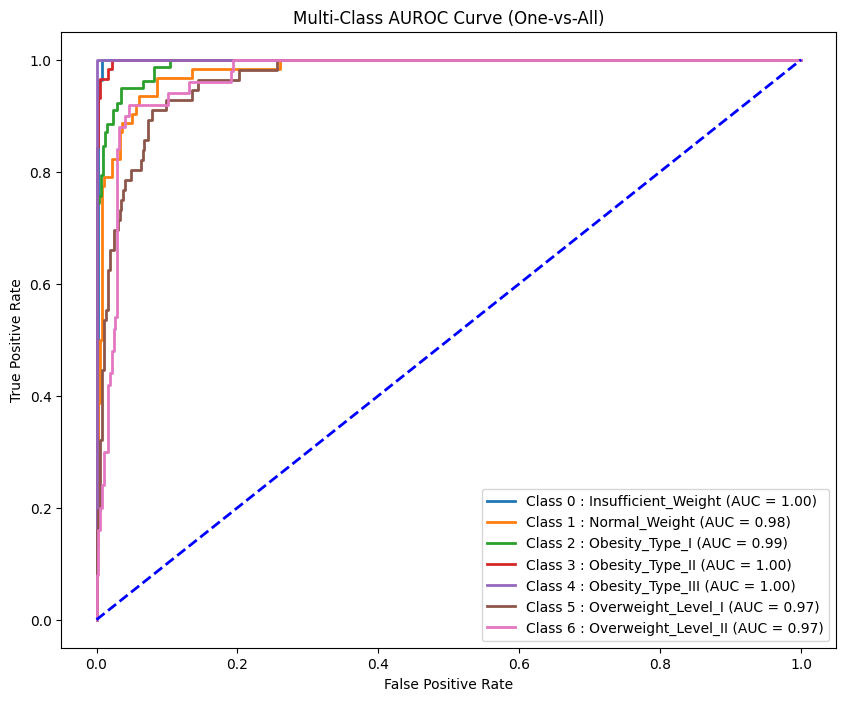

In [75]:
# Plot Multi-Class AUROC curve
plt.figure(figsize=(10, 8))
for i in range(unique_classes.size):
    fpr, tpr, _ = roc_curve(y_valid_bin[:, i], model_logistic_regression.predict_proba(X_valid)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} : {unique_classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUROC Curve (One-vs-All)')
plt.legend(loc='lower right')
plt.show()

### Model K nearest Neighbours

In [76]:
# K nearest Neighbours
model_knn_neighbours.fit(X_train, y_train)

#Printing model accuracy
print("Results for K nearest Neighbours:")
# Predictions
y_pred_knn_neighbours = model_knn_neighbours.predict(X_valid)

# Accuracy
accuracy = accuracy_score(y_valid, y_pred_knn_neighbours)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred_knn_neighbours)
print(f"Confusion Matrix:\n{conf_matrix}")

#classification_report
print(classification_report(y_valid,y_pred_knn_neighbours))

#check incorrect predictions
df_knn_neighbours = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_knn_neighbours})
print("Number of Incorrect predictions:" , len(df_knn_neighbours[df_knn_neighbours['truth'] != df_knn_neighbours['prediction']]))

Results for K nearest Neighbours:
Accuracy: 0.8203309692671394
Confusion Matrix:
[[51  3  0  0  0  2  0]
 [17 28  6  0  0  2  9]
 [ 0  0 72  2  0  1  3]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 3  9  4  0  0 38  2]
 [ 1  2  3  3  1  2 38]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.71      0.91      0.80        56
      Normal_Weight       0.67      0.45      0.54        62
     Obesity_Type_I       0.84      0.92      0.88        78
    Obesity_Type_II       0.92      0.98      0.95        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.84      0.68      0.75        56
Overweight_Level_II       0.73      0.76      0.75        50

           accuracy                           0.82       423
          macro avg       0.81      0.82      0.81       423
       weighted avg       0.82      0.82      0.81       423

Number of Incorrect predictions: 76


#### Performance of Model K-Nearest Neighbours

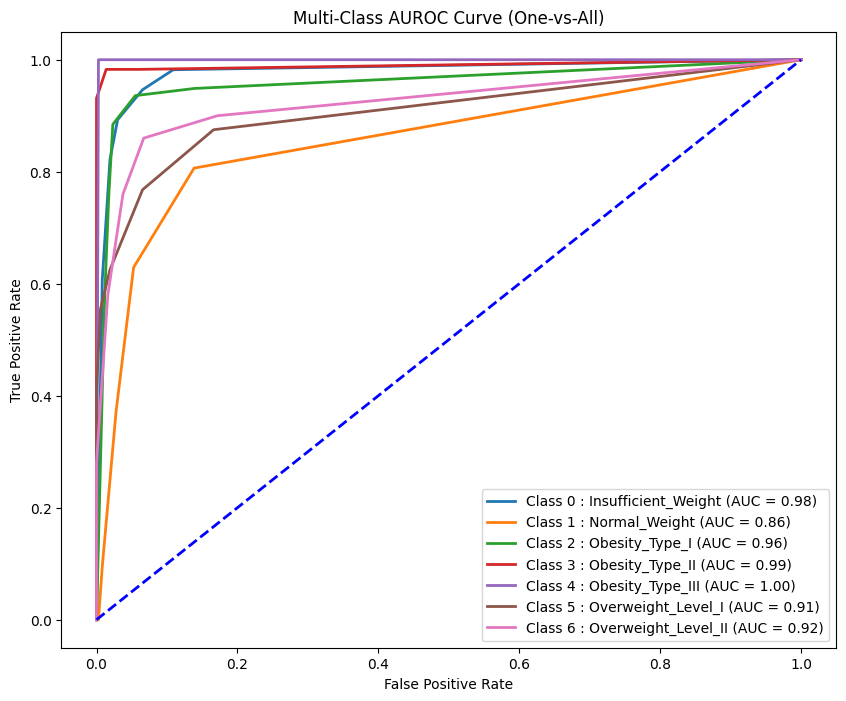

In [77]:
# Plot Multi-Class AUROC curve
plt.figure(figsize=(10, 8))
for i in range(unique_classes.size):
    fpr, tpr, _ = roc_curve(y_valid_bin[:, i], model_knn_neighbours.predict_proba(X_valid)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} : {unique_classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUROC Curve (One-vs-All)')
plt.legend(loc='lower right')
plt.show()

# Model Random Forest

In [78]:
#random forest results
model_random_forest.fit(X_train, y_train)

#Printing model accuracy
print("Results for Random Forest Classifier:")

# Predictions
y_pred_random_forest = model_random_forest.predict(X_valid)

# Accuracy
accuracy = accuracy_score(y_valid, y_pred_random_forest)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred_random_forest)
print(f"Confusion Matrix:\n{conf_matrix}")

#classification_report
print(classification_report(y_valid,y_pred_random_forest))

#Truth vs Prediction
df_random_forest = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_random_forest})
print("Number of Incorrect predictions RandomForest Model :" , len(df_random_forest[df_random_forest['truth'] != df_random_forest['prediction']]))

Results for Random Forest Classifier:
Accuracy: 0.9479905437352246
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 0 55  0  0  0  6  1]
 [ 0  1 74  2  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 49  1]
 [ 0  0  0  0  0  2 48]]
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.87      0.89      0.88        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.88      0.87        56
Overweight_Level_II       0.94      0.96      0.95        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423

Number of Incorrect predictions RandomForest Model : 22


#### Performance of Model Random Forest

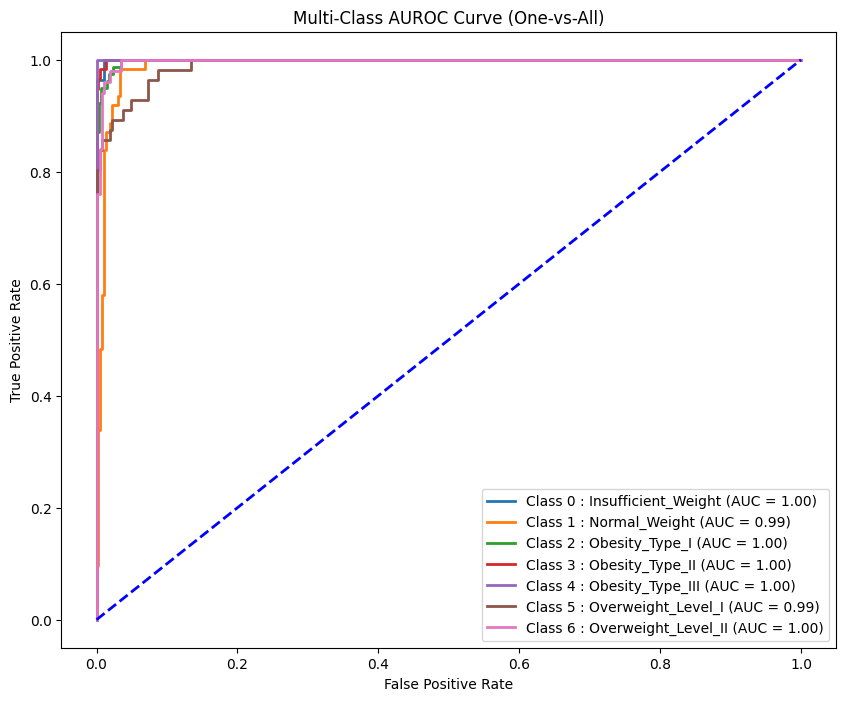

In [79]:
# Plot Multi-Class AUROC curve
plt.figure(figsize=(10, 8))
for i in range(unique_classes.size):
    fpr, tpr, _ = roc_curve(y_valid_bin[:, i], model_random_forest.predict_proba(X_valid)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} : {unique_classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUROC Curve (One-vs-All)')
plt.legend(loc='lower right')
plt.show()

# Part 2: Brute force LOO influence



# Selecting the indices randomly

In [133]:
from copy import deepcopy
import random

# valid_indices = [idx for idx in range(len(X_train)) if pd.notnull(X_train[idx]) and pd.notnull(X_valid[idx]) and pd.notnull(y_train[idx]) and pd.notnull(y_valid[idx])]

indices_number = 10
indices_selected = [926, 632, 131, 1484, 842, 769, 175, 1286, 1500, 950]

# indices_selected = random.sample(range(len(X_train)), indices_number)
# indices_selected = random.sample(valid_indices, indices_number)
print("Randomly selected indices:", indices_selected)



Randomly selected indices: [926, 632, 131, 1484, 842, 769, 175, 1286, 1500, 950]


# Calculating the influence for each one of the selected data points

In [134]:

influence_scores = []

for index in indices_selected:

    # Make the copy of the data points on selected indices
    X_train_copy = deepcopy(X_train)
    y_train_copy = deepcopy(y_train)

    # Removed the data point on selected index
    X_train_selected_index_removed = np.delete(X_train_copy, index, axis=0)
    y_train_selected_index_removed = np.delete(y_train_copy, index, axis=0)

    #Retrain using Random forest model
    random_forest_model_with_removed_index = RandomForestClassifier(n_estimators=150,max_depth=12,min_samples_leaf=4)
    random_forest_model_with_removed_index.fit(X_train_selected_index_removed, y_train_selected_index_removed)

    # predict the validation set for random_forest_model_with_removed_index
    y_pred_valid_removed = random_forest_model_with_removed_index.predict(X_valid)

    #compute the accuracy with data point removed
    precision_score_with_removed_index = precision_score(y_valid, y_pred_valid_removed, average='weighted')

    #predict validation set with selected data point
    X_valid_with_point = np.vstack([X_valid, X_train_copy[index]])
    y_valid_with_point = np.append(y_valid, y_train_copy[index])
    y_pred_valid_with_point = random_forest_model_with_removed_index.predict(X_valid_with_point)

    #compute accuracy score with the selected data point
    precision_score_with_point = accuracy_score(y_valid_with_point, y_pred_valid_with_point)

    # compute influence score
    influence_score = precision_score_with_point - precision_score_with_removed_index
    influence_scores.append(influence_score)

# Create a DataFrame to store the influence scores
influence_df = pd.DataFrame({
    'Data Point': indices_selected,
    'Influence Score': influence_scores
})

# Print the DataFrame
print(influence_df)


   Data Point  Influence Score
0         926        -0.003091
1         632        -0.003328
2         131        -0.003530
3        1484        -0.003309
4         842        -0.000014
5         769        -0.003082
6         175        -0.003129
7        1286        -0.003278
8        1500        -0.002506
9         950        -0.002420
